**Overview**
This notebook loads the Pima-style diabetes dataset, performs EDA, cleans data (handles zeros / missing), handles outliers, scales features, balances classes with SMOTE, trains several classifiers, evaluates them, and saves the trained objects (scaler + best model)

## Load standard libraries and dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("diabetes_synthetic_multiclass.csv")
dataset.head(6)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,1,56,21.1,1.16,9.66,243,211,34,108,42.2,23.1,2
1,0,52,17.3,1.52,7.10,158,260,40,120,52.0,26.3,2
2,0,37,13.6,0.49,5.59,212,30,50,80,6.0,22.5,0
3,0,39,20.9,0.79,6.50,177,141,49,77,28.2,23.9,1
4,0,49,14.0,1.08,4.63,166,30,79,145,6.0,24.9,0
5,1,60,27.7,0.92,7.75,260,96,49,122,19.2,32.9,2


# Data Preprocessing

In [2]:
dataset.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

# No ANY NULL VALUES FOUND

In [3]:
print(dataset.corr()["Class"].abs().sort_values(ascending=False))

Class     1.000000
HbA1c     0.859467
BMI       0.640850
AGE       0.525687
VLDL      0.514543
TG        0.514543
Urea      0.492660
HDL       0.481826
Cr        0.471197
Chol      0.346448
LDL       0.325261
Gender    0.024497
Name: Class, dtype: float64


## This Correlation show Our Dataset Follow Non_Linearity 

Class
2    400
0    400
1    400
Name: count, dtype: int64
Class
2    33.333333
0    33.333333
1    33.333333
Name: proportion, dtype: float64


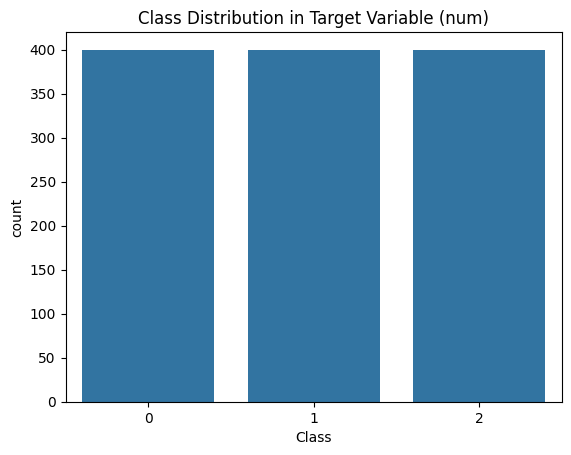

In [4]:
# Count of each class
print(dataset["Class"].value_counts())

# Percentage distribution
print(dataset["Class"].value_counts(normalize=True) * 100)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Class", data=dataset)
plt.title("Class Distribution in Target Variable (num)")
plt.show()


# Here the class is balanced 

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1200 non-null   int64  
 1   AGE     1200 non-null   int64  
 2   Urea    1200 non-null   float64
 3   Cr      1200 non-null   float64
 4   HbA1c   1200 non-null   float64
 5   Chol    1200 non-null   int64  
 6   TG      1200 non-null   int64  
 7   HDL     1200 non-null   int64  
 8   LDL     1200 non-null   int64  
 9   VLDL    1200 non-null   float64
 10  BMI     1200 non-null   float64
 11  Class   1200 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 112.6 KB


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.493333,49.277500,16.726500,1.035483,6.695025,196.499167,152.859167,48.470000,116.149167,30.571833,26.873917,1.000000
std,0.500164,13.300924,5.146266,0.265751,1.531378,31.496535,79.357140,11.504683,26.632618,15.871428,5.087622,0.816837
min,0.000000,18.000000,6.000000,0.400000,4.220000,120.000000,30.000000,15.000000,58.000000,6.000000,15.700000,0.000000
25%,0.000000,40.000000,13.000000,0.850000,5.590000,174.750000,94.750000,40.000000,98.000000,18.950000,23.000000,0.000000
50%,0.000000,50.000000,16.100000,1.020000,6.185000,195.000000,142.000000,48.000000,113.500000,28.400000,26.400000,1.000000
75%,1.000000,58.000000,19.800000,1.190000,7.592500,217.000000,201.000000,56.000000,133.000000,40.200000,30.300000,2.000000
max,1.000000,84.000000,34.600000,1.930000,12.070000,311.000000,475.000000,90.000000,220.000000,95.000000,44.500000,2.000000


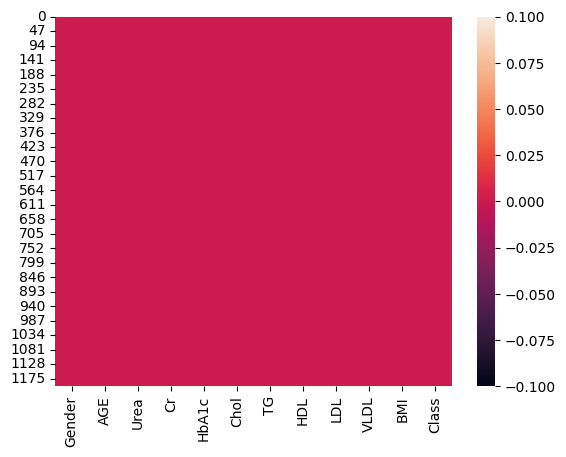

In [7]:
sns.heatmap(dataset.isnull())
plt.show()

In [8]:
numerical_features = dataset.select_dtypes(include="number")
numerical_features

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,1,56,21.1,1.16,9.66,243,211,34,108,42.2,23.1,2
1,0,52,17.3,1.52,7.10,158,260,40,120,52.0,26.3,2
2,0,37,13.6,0.49,5.59,212,30,50,80,6.0,22.5,0
3,0,39,20.9,0.79,6.50,177,141,49,77,28.2,23.9,1
4,0,49,14.0,1.08,4.63,166,30,79,145,6.0,24.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,46,8.0,1.15,10.24,259,229,24,150,45.8,32.1,2
1196,1,75,31.4,0.91,10.77,176,221,31,125,44.2,32.9,2
1197,0,57,9.9,1.01,8.70,224,364,25,132,72.8,29.1,2
1198,0,45,20.1,0.89,9.73,177,129,38,192,25.8,36.0,2


In [9]:
Categorical_features = dataset.select_dtypes(include= "object")
Categorical_features

""
0
1
2
3
4
...
1195
1196
1197
1198


# Checking Outliers 

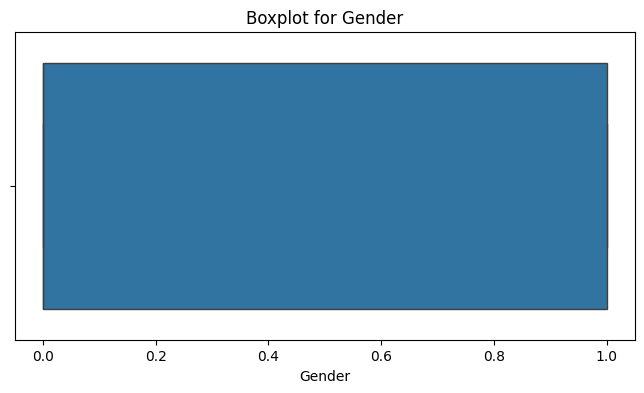

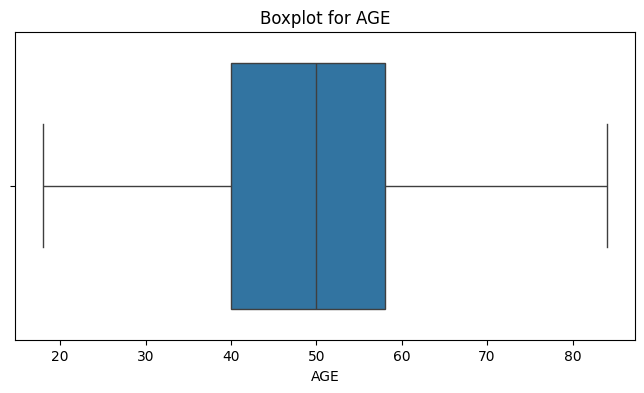

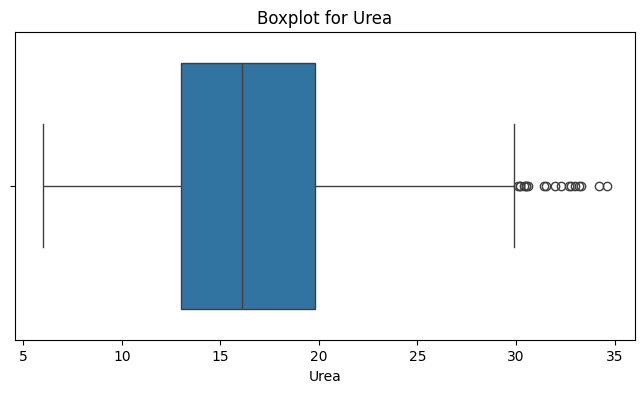

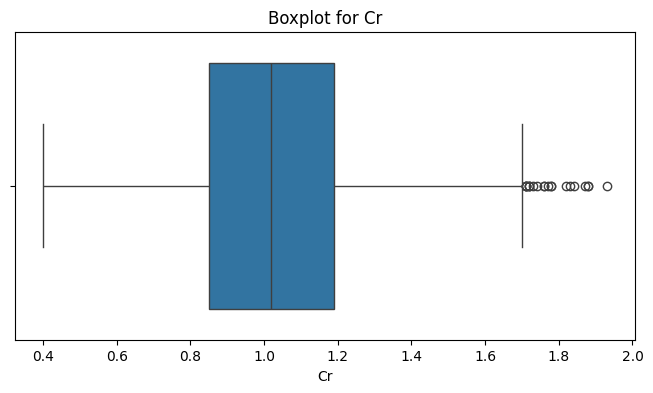

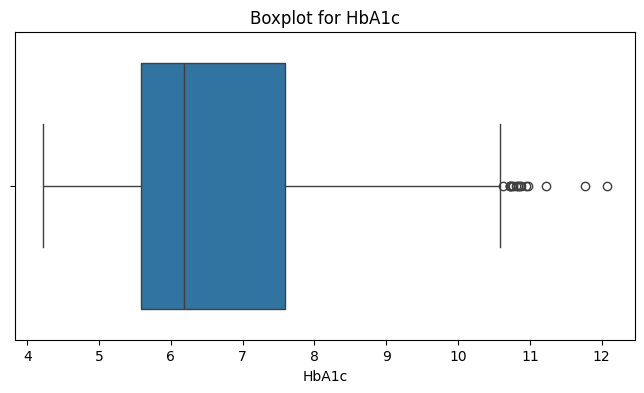

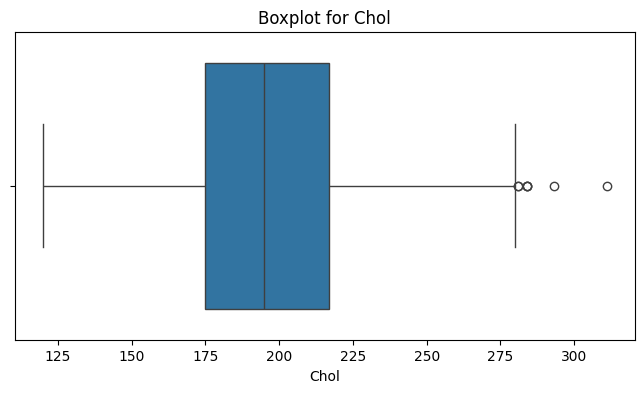

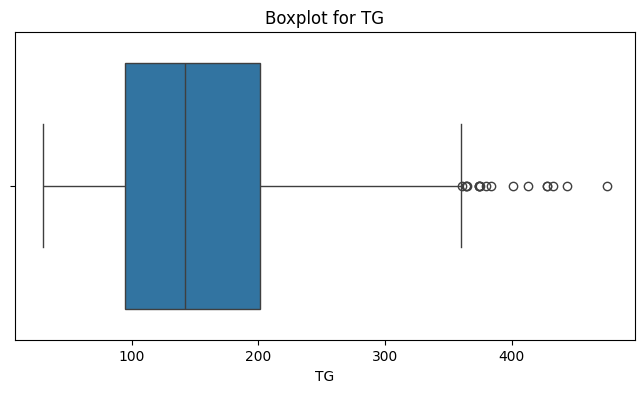

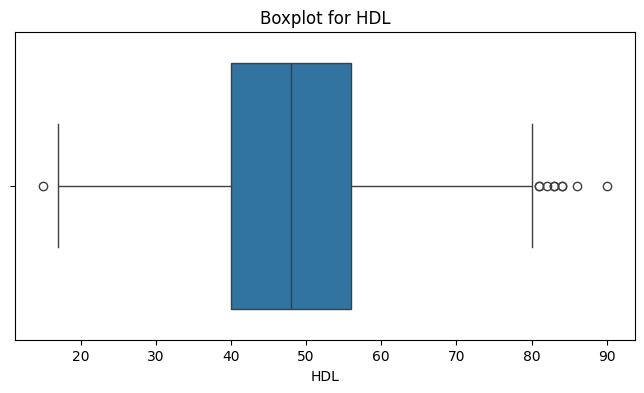

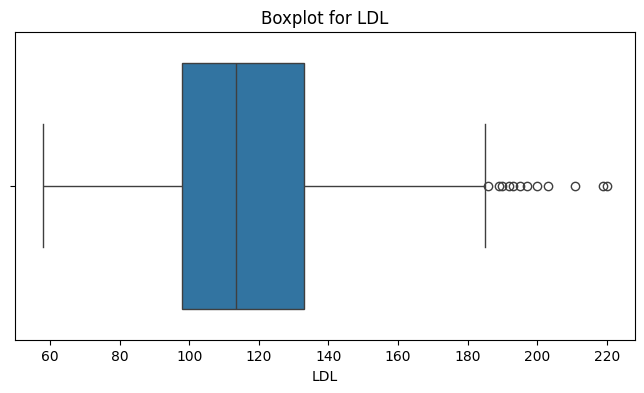

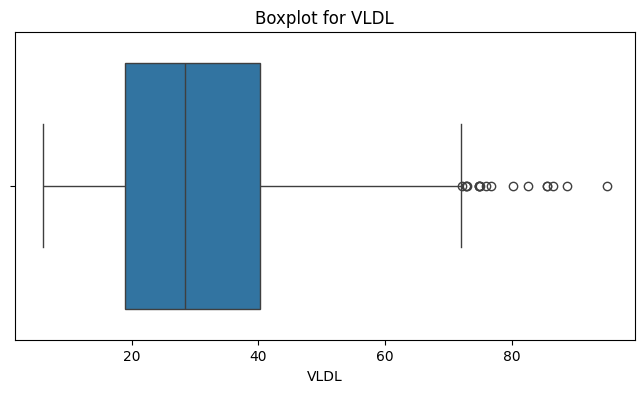

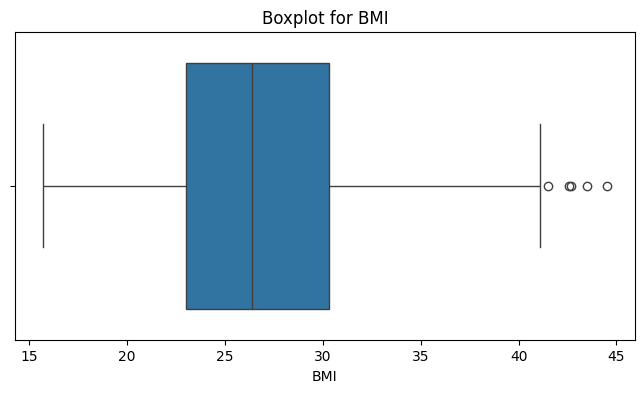

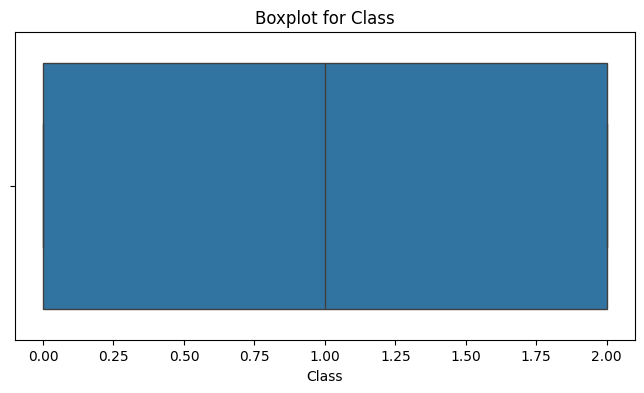

In [10]:

for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

# REMOVING OUTLIERS

In [11]:
dataset.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,1,56,21.1,1.16,9.66,243,211,34,108,42.2,23.1,2
1,0,52,17.3,1.52,7.10,158,260,40,120,52.0,26.3,2
2,0,37,13.6,0.49,5.59,212,30,50,80,6.0,22.5,0


In [12]:
# Iterate through each numerical column to remove outliers
selected_columns = ["AGE","Urea","Cr","HbA1c","Chol","TG","HDL","LDL","VLDL","BMI"]
for column in selected_columns:

    print(f"Processing column: {column}")
    
    # Calculate Q1, Q3, and IQR
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier thresholds
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    
    # print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    # print(f"Outlier thresholds for {column}: [{min_range}, {max_range}]")
    
    # Remove outliers for this column
    dataset = dataset[(dataset[column] >= min_range) & (dataset[column] <= max_range)]

Processing column: AGE
Processing column: Urea
Processing column: Cr
Processing column: HbA1c
Processing column: Chol
Processing column: TG
Processing column: HDL
Processing column: LDL
Processing column: VLDL
Processing column: BMI


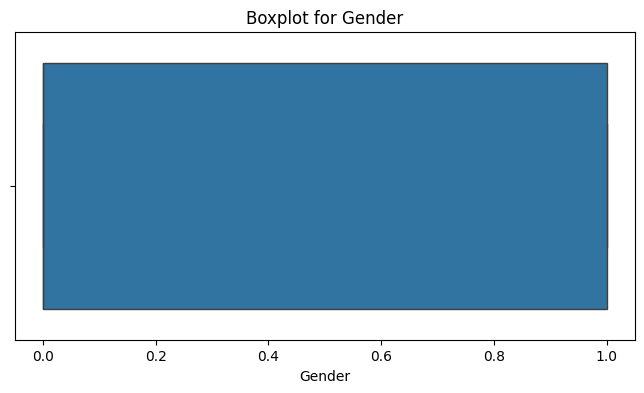

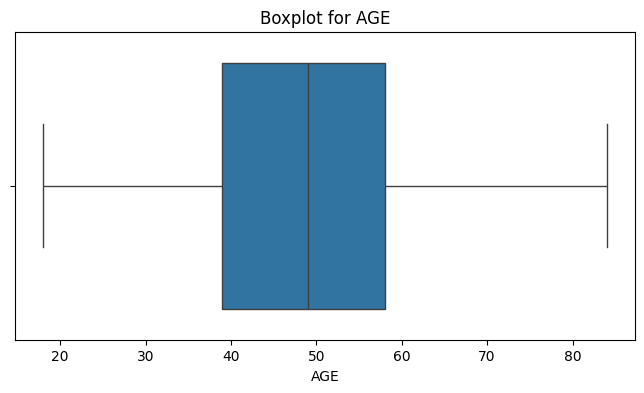

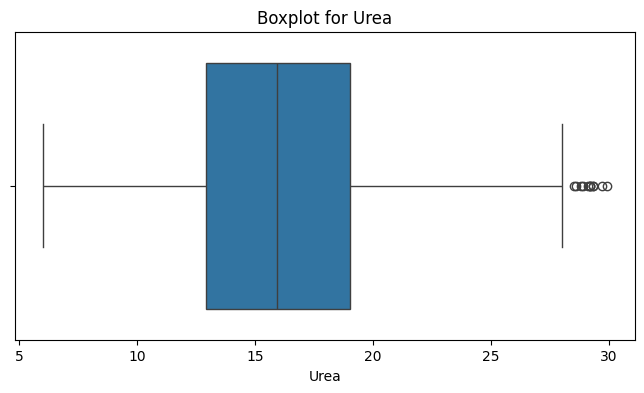

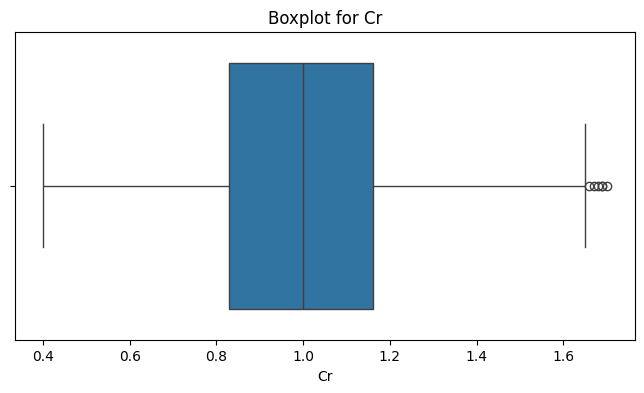

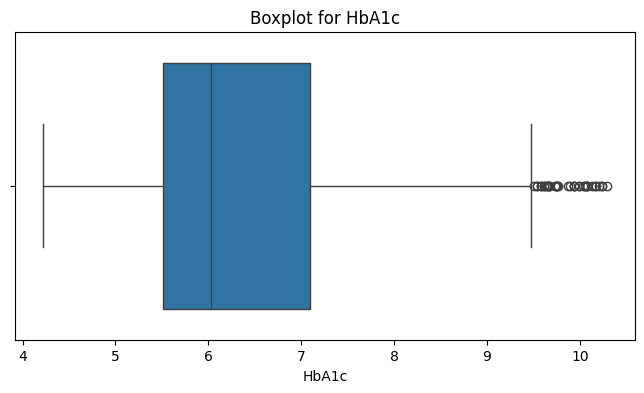

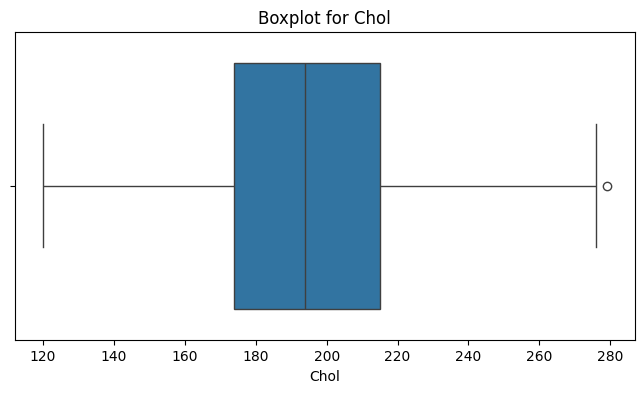

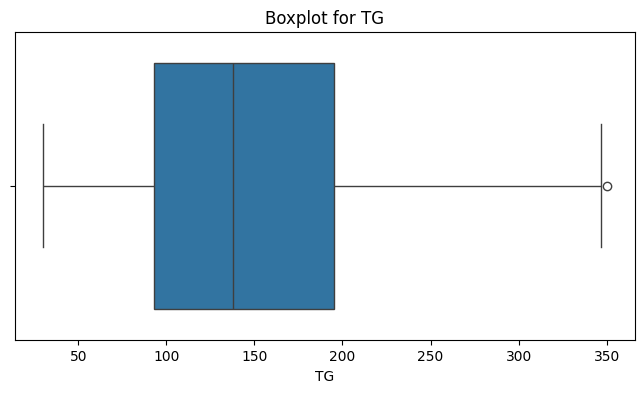

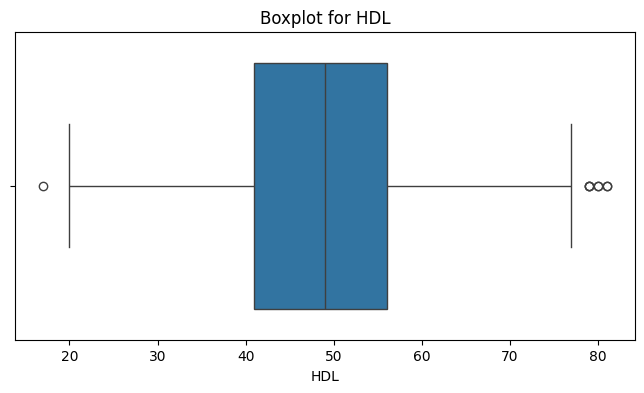

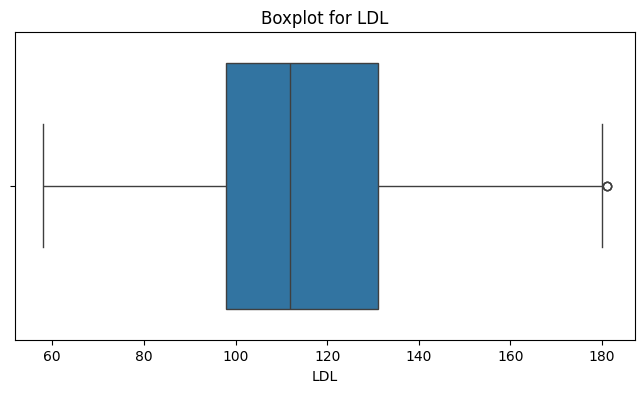

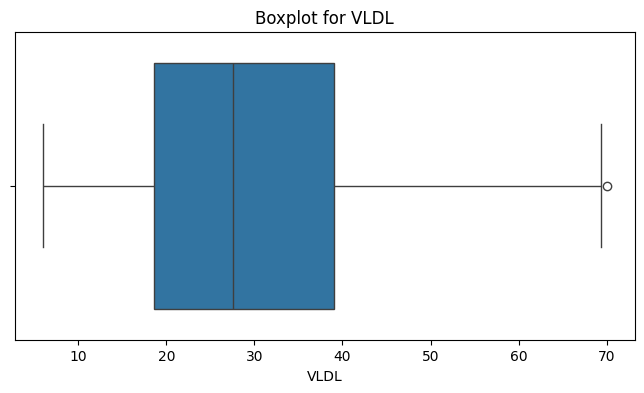

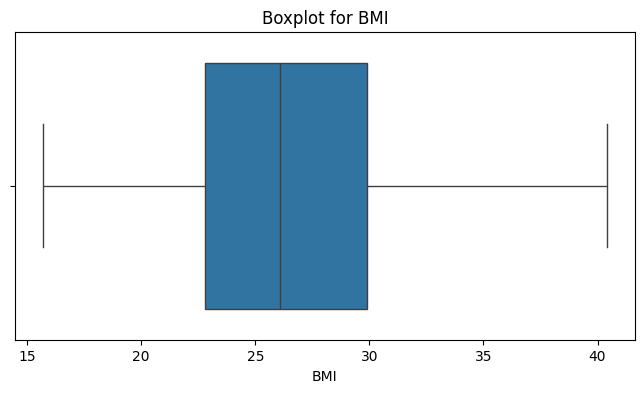

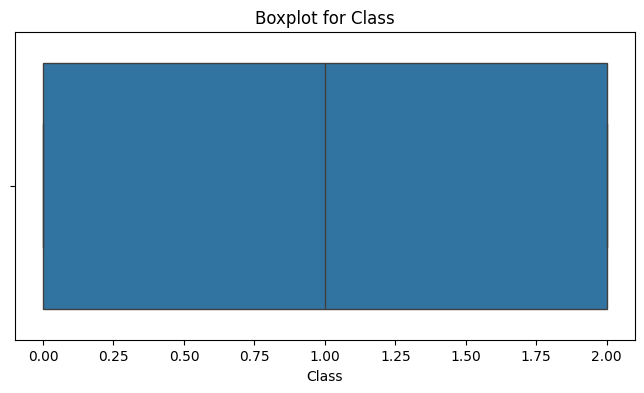

In [13]:
# Iterate over all numerical columns
for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [14]:
dataset.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,1,56,21.1,1.16,9.66,243,211,34,108,42.2,23.1,2
1,0,52,17.3,1.52,7.10,158,260,40,120,52.0,26.3,2
2,0,37,13.6,0.49,5.59,212,30,50,80,6.0,22.5,0


## Feature Scalling 
Machine Learning algorithms (like SVM, KNN, Logistic Regression, Gradient Boosting, etc.) tend to give **more weight** to features with larger numerical ranges.  
- To avoid this bias, **scaling** is applied.

---

**Method for Scaling:**
- We are using **StandardScaler**.  

In [15]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Select columns to scale (numerical ones)
columns_to_scale = [ 'AGE', 'Cr','Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Apply scaling
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
dataset.head(3)

# Display scaled data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,1,0.554978,1.039230,0.623226,2.367711,1.567740,0.900713,-1.361618,-0.270233,0.900713,-0.696139,2
1,0,0.254878,0.227817,2.093670,0.466209,-1.211508,1.578126,-0.819867,0.219868,1.578126,-0.042562,2
2,0,-0.870499,-0.562242,-2.113434,-0.655380,0.554132,-1.601571,0.083052,-1.413802,-1.601571,-0.818684,0


##  Saving the Scaler

After fitting the **StandardScaler** on the training data, we save it to a file so that it can be reused later without needing to re-fit.
 This ensures that training data and future unseen data are always scaled in exactly the same way.

In [16]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [17]:
dataset.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,1,0.554978,1.039230,0.623226,2.367711,1.567740,0.900713,-1.361618,-0.270233,0.900713,-0.696139,2
1,0,0.254878,0.227817,2.093670,0.466209,-1.211508,1.578126,-0.819867,0.219868,1.578126,-0.042562,2
2,0,-0.870499,-0.562242,-2.113434,-0.655380,0.554132,-1.601571,0.083052,-1.413802,-1.601571,-0.818684,0
3,0,-0.720449,0.996524,-0.888064,0.020544,-0.590264,-0.067021,-0.007240,-1.536328,-0.067021,-0.532744,1
4,0,0.029803,-0.476830,0.296461,-1.368443,-0.949932,-1.601571,2.701516,1.240912,-1.601571,-0.328501,0


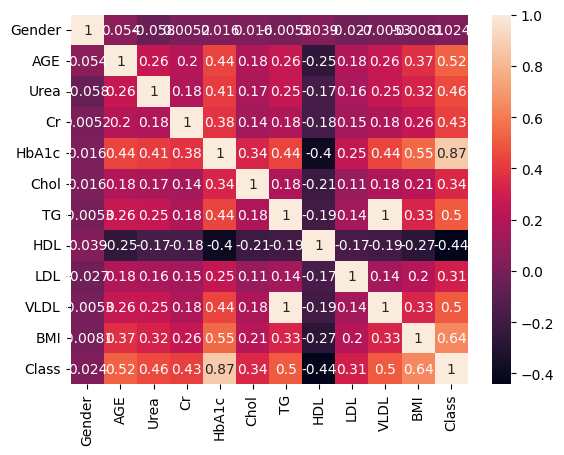

In [18]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [19]:
# sns.pairplot(data=dataset)
# plt.show()

In [20]:
dataset.tail(100)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
1087,1,-0.720449,-0.177889,0.133078,-0.826218,-0.557567,-0.716786,1.347138,-0.351917,-0.716786,-1.349715,0
1088,0,0.254878,1.487642,0.786609,0.117105,0.652223,0.817764,1.437430,-0.392758,0.817764,0.917380,1
1089,1,0.254878,1.060583,0.704917,0.770746,2.352469,0.098876,-1.542202,-0.147708,0.098876,-1.125048,2
1090,0,-0.120248,2.320408,1.480985,1.580370,-1.015326,1.591951,0.715095,-0.106866,1.591951,0.161681,2
1091,0,0.479953,0.419994,0.133078,-0.113155,-1.538478,0.831589,-0.639283,-0.025183,0.831589,-0.287653,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1191,0,-0.720449,0.334582,-1.173984,-0.922779,-0.688355,0.361546,0.715095,0.464918,0.361546,-1.635655,0
1192,0,-0.420348,0.014288,-0.765527,-0.952490,-0.328688,0.458320,-1.181034,-0.719492,0.458320,-1.778625,0
1193,1,-0.345323,1.444936,-0.071151,-0.365698,0.390647,-0.122321,0.173344,-0.842018,-0.122321,0.039136,1
1194,0,-2.295976,-1.074713,0.092232,-0.789079,-0.851841,0.112701,0.353927,0.056501,0.112701,-1.288443,0


### We split the dataset into **training (75%)** and **testing (25%)** sets using `train_test_split`.

In [21]:

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
x = dataset.drop('Class',axis=1)
y = dataset["Class"]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [22]:
x

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,1,0.554978,1.039230,0.623226,2.367711,1.567740,0.900713,-1.361618,-0.270233,0.900713,-0.696139
1,0,0.254878,0.227817,2.093670,0.466209,-1.211508,1.578126,-0.819867,0.219868,1.578126,-0.042562
2,0,-0.870499,-0.562242,-2.113434,-0.655380,0.554132,-1.601571,0.083052,-1.413802,-1.601571,-0.818684
3,0,-0.720449,0.996524,-0.888064,0.020544,-0.590264,-0.067021,-0.007240,-1.536328,-0.067021,-0.532744
4,0,0.029803,-0.476830,0.296461,-1.368443,-0.949932,-1.601571,2.701516,1.240912,-1.601571,-0.328501
...,...,...,...,...,...,...,...,...,...,...,...
1191,0,-0.720449,0.334582,-1.173984,-0.922779,-0.688355,0.361546,0.715095,0.464918,0.361546,-1.635655
1192,0,-0.420348,0.014288,-0.765527,-0.952490,-0.328688,0.458320,-1.181034,-0.719492,0.458320,-1.778625
1193,1,-0.345323,1.444936,-0.071151,-0.365698,0.390647,-0.122321,0.173344,-0.842018,-0.122321,0.039136
1194,0,-2.295976,-1.074713,0.092232,-0.789079,-0.851841,0.112701,0.353927,0.056501,0.112701,-1.288443


In [23]:
y

0       2
1       2
2       0
3       1
4       0
       ..
1191    0
1192    0
1193    1
1194    0
1195    2
Name: Class, Length: 1085, dtype: int64

## Model Accuracuy 

In [24]:
from sklearn.ensemble import RandomForestClassifier
# print("Decision Tree Classification")
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
# y_pred_dt = dt_classifier.predict(X_test)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
rf_classifier.score(X_train,y_train)*100

100.0

In [26]:
rf_classifier.score(X_test,y_test)*100

98.52941176470588

In [27]:
rf_classifier.predict([[0,	0.075940,	-0.749443,	-0.730485,	-0.206952,	1.044983,	0.176118,	-1.133442,	-1.283796,	-0.139873,	-1.014508]])

D:\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [28]:
# predict for a new patient
prediction = rf_classifier.predict([[ 0,	0.075940,	-0.749443,	-0.730485,	-0.206952,	1.044983,	0.176118,	-1.133442,	-1.283796,	-0.139873,	-1.014508]])

print("Prediction (numeric):", prediction[0])

# map numeric prediction to label
if prediction[0] == 0:
    print("No Diabetes")
elif prediction[0] == 1:
    print("Type 1 Diabetes")
elif prediction[0] == 2:
    print("Type 2 Diabetes")

Prediction (numeric): 1
Type 1 Diabetes


D:\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
import joblib

# save trained model
joblib.dump(rf_classifier, "diabetes_model.pkl")


['diabetes_model.pkl']

In [30]:
y_pred = rf_classifier.predict(X_test)

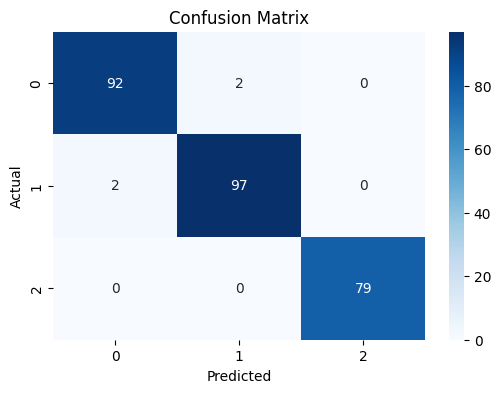

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.98      0.98      0.98        99
           2       1.00      1.00      1.00        79

    accuracy                           0.99       272
   macro avg       0.99      0.99      0.99       272
weighted avg       0.99      0.99      0.99       272



In [33]:

train_set = X_train.copy()
test_set = X_test.copy()

# check for duplicates
overlap = pd.merge(train_set, test_set, how='inner')
print("Overlap rows:", len(overlap))

Overlap rows: 0
